Queremos generar números aleatorios con una distribución normal.  Para ello sabemos generar fácilmente números aleatorios con distribución exponencial.

In [1]:
import scipy.stats as st

f = st.norm(loc=0., scale=1.)
g = st.expon(loc=0, scale=1.)

$$f(x)=\frac{1}{\sqrt{2\pi}} e^{-x²/2}$$

$$g(x)=e^{-x}$$

$$\frac{f(x)}{g(x)}=\frac{1}{\sqrt{2\pi}} e^{x-x²/2}$$

El máximo ocurre cuando el exponente es máximo, es decir:
    
$$max_x(x-x^2/2) = 1$$

In [2]:
import numpy as np

x = np.linspace(-2,4,100)
y = x - x*x/2

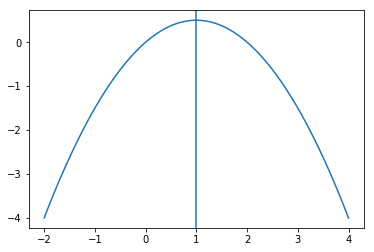

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(x,y)
plt.axvline(x=1)

In [4]:
def fg(x):
    return (f.pdf(x)/g.pdf(x))

In [5]:
y = [fg(t) for t in x]

/store/marce/TeachJob/AstrometriaI/pyramid/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


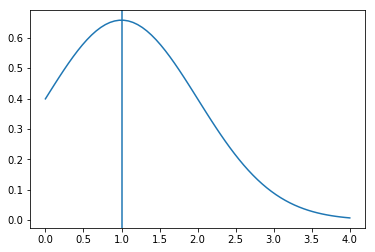

In [6]:
plt.plot(x,y)
plt.axvline(x=1)

Por lo tanto, 

$$c=\left.max\left(\frac{f}{g}\right)\right|_{x=1} = \frac{f(1)}{g(1)} = \sqrt{\frac{2e}{\pi}}$$

In [64]:
c = f.pdf(1)/g.pdf(1)

In [65]:
c

0.65774462347945695

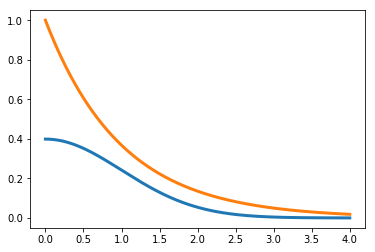

In [66]:
x = np.linspace(0,4,500)
y1 = f.pdf(x)
y2 = g.pdf(x)

plt.plot(x,y1,x,y2,lw=3)
plt.show()

[]

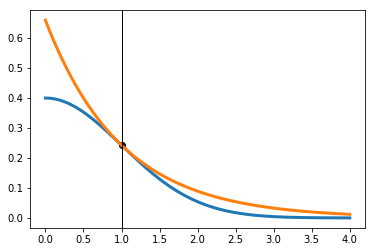

In [67]:
y2 = g.pdf(x)*c

plt.plot(x,y1,x,y2,lw=3)
plt.axvline(x=1.,c='k',lw=1)
plt.scatter([1],f.pdf(1),c='k')
plt.plot()

In [68]:
fg(1)

0.65774462347945695

In [69]:
import random

N = 1000
k=0
r = []
condicion = True
while condicion:
    condicion = k<N
    x = g.rvs(1)
    if fg(x)<c:
        if random.random()<0.5:
            r.append(x[0])
        else:
            r.append(-x[0])
        k+=1

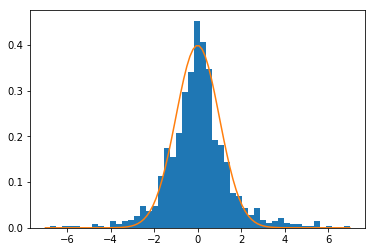

In [70]:
H = plt.hist(r, 50, density=True)

x = np.linspace(-7,7,100)
y = f.pdf(x)
plt.plot(x,y)

plt.show()

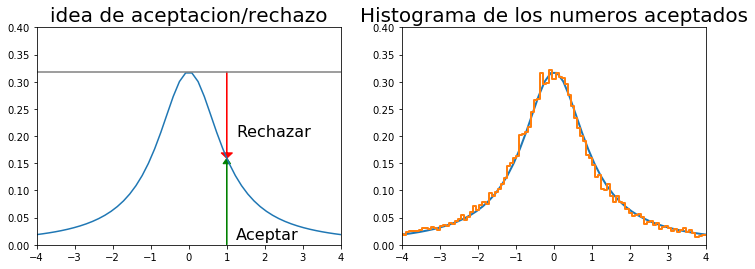

In [71]:
# Suppose we want to sample from the (truncated) T distribution witb 10 degrees of freedom
# We use the uniform as a proposal distibution (highly inefficient)

from scipy import stats as st
x = np.linspace(-4, 4)

df = 10
dist = st.cauchy()
upper = dist.pdf(0)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(x, dist.pdf(x))
plt.axhline(upper, color='grey')
px = 1.0
plt.arrow(px,0,0,dist.pdf(1.0)-0.01, linewidth=1,
              head_width=0.2, head_length=0.01, fc='g', ec='g')
plt.arrow(px,upper,0,-(upper-dist.pdf(px)-0.01), linewidth=1,
              head_width=0.3, head_length=0.01, fc='r', ec='r')
plt.text(px+.25, 0.2, 'Rechazar', fontsize=16)
plt.text(px+.25, 0.01, 'Aceptar', fontsize=16)
plt.axis([-4,4,0,0.4])
plt.title('idea de aceptacion/rechazo', fontsize=20)

plt.subplot(122)
n = 100000
# generate from sampling distribution
u = np.random.uniform(-4, 4, n)
# accept-reject criterion for each point in sampling distribution
r = np.random.uniform(0, upper, n)
# accepted points will come from target (Cauchy) distribution
v = u[r < dist.pdf(u)]

plt.plot(x, dist.pdf(x), linewidth=2)

# Plot scaled histogram
factor = dist.cdf(4) - dist.cdf(-4)
hist, bin_edges = np.histogram(v, bins=100, normed=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.
plt.step(bin_centers, factor*hist, linewidth=2)

plt.axis([-4,4,0,0.4])
plt.title('Histograma de los numeros aceptados', fontsize=20);